# Аналитика параметров спортсменов с помощью методов Big Data

In [115]:
import numpy as np 
import pandas as pd

import plotly.graph_objects as go

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz

import warnings

In [116]:
warnings.simplefilter(action='ignore', category=FutureWarning) 

### Подгружаем датасет профессиональных спортсменов и обрабатываем

In [117]:
FILE_PATH = './player_stats.csv'

df = pd.read_csv(FILE_PATH) # encoding='ISO-8859-1'

df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas Dähne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Man�,Senegal,174,69,31,FC Bayern M�nchen,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000


In [118]:
df.columns

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

#### Описание столбцов

|Наименование столбца        |Описание                                      |
|:--------------------------|:----------------------------------------------|
|`player`                    | Имя игрока                                   |
|`country`                   | Страна игрока                                |
|`height`                    | Рост в см                                    |
|`weight`                    | Вес в кг                                     |
|`age`                       | Возраст                                      |
|`club`                      | Клуб за который играет                       |
|`ball_control`              | Умение владения мяча                         |
|`dribbling`                 | Способность к дриблингу                      |
|`marking`                   | Способность отмечать соперника *(заметить)*  |
|`slide_tackle`              | Способность выполнять скользящий подкат      |
|`stand_tackle`              | Способность выполнять подкат стоя            |
|`aggression`                | Уровень агрессии                             |
|`reactions`                 | Время реакции игрока                         |
|`att_position`              | Позиция для атакующих действий               |
|`interceptions`             | Умение перехватывать передачи                |
|`vision`                    | Уровень видения игрока на поле               |
|`composure`                 | Уровень хладнокровия *(в момент давления)*   |
|`crossing`                  | Способность выполнять кроссы                 |
|`short_pass`                | Точность коротких передач                    |
|`long_pass`                 | Точность дальних передач                     |
|`acceleration`              | Ускорение                                    |
|`stamina`                   | Уровень выносливости                         |
|`strength`                  | Физическая сила                              |
|`balance`                   | Равновесие игрока                            |
|`sprint_speed`              | Скорость спринта                             |
|`agility`                   | Ловкость в маневрировании                    |
|`jumping`                   | Способность к прыжкам                        |
|`heading`                   | Уровень владения мячом головной игрой        |
|`shot_power`                | Сила удара                                   |
|`finishing`                 | Навык в завершении *(решить)*                |
|`long_shots`                | Навык наносить дальние удары                 |
|`curve`                     | Способность отправлять мяч по кривой         |
|`fk_acc`                    | Точность штрафного удара                     |
|`penalties`                 | Навык исполнения пенальти                    |
|`volleys`                   | Навык при выполнении залпового удара         |
|`gk_positioning`            | Атрибут расположения вратаря **(специфично для вратаря)**                  |
|`gk_diving`                 | Способность к прыжкам вратаря **(специфично для вратаря)**                 |
|`gk_handling`               | Умение вратаря обращаться с мячом **(специфично для вратаря)**             |
|`gk_kicking`                | Способность вратаря наносить удары **(специфично для вратаря)**            |
|`gk_reflexes`               | Уровень рефлексов вратаря **(специфично для вратаря)**                     |
|`value`                     | Ценность/стоимость игрока *($)*                                            |

### Этап EDA

In [119]:
df.shape

(5682, 41)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [121]:
# Прежде всего избавляемся от лишних пробелов в категориальных признаках

df['player'] = df['player'].apply(lambda v: v.strip())
df['club'] = df['club'].apply(lambda v: v.strip())
df['country'] = df['country'].apply(lambda v: v.strip())
df['value'] = df['value'].apply(lambda v: v.strip())

In [122]:
df['player'] = df['player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # Исправляем некоторые ошибки кодировки

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
def player_value_to_num(value):
    return value.replace('.', '')[1:]

# Заметим, что поле value (стоимость игрока) имеет тип object, а примерное значение - $1.400.000
# Нужно перевести в число
df['value'] = pd.to_numeric(df['value'].apply(lambda v: player_value_to_num(v)))

In [125]:
df.isna().mean()*100

player              0.0
country             0.0
height              0.0
weight              0.0
age                 0.0
club                0.0
ball_control        0.0
dribbling           0.0
marking           100.0
slide_tackle        0.0
stand_tackle        0.0
aggression          0.0
reactions           0.0
att_position        0.0
interceptions       0.0
vision              0.0
composure           0.0
crossing            0.0
short_pass          0.0
long_pass           0.0
acceleration        0.0
stamina             0.0
strength            0.0
balance             0.0
sprint_speed        0.0
agility             0.0
jumping             0.0
heading             0.0
shot_power          0.0
finishing           0.0
long_shots          0.0
curve               0.0
fk_acc              0.0
penalties           0.0
volleys             0.0
gk_positioning      0.0
gk_diving           0.0
gk_handling         0.0
gk_kicking          0.0
gk_reflexes         0.0
value               0.0
dtype: float64

In [126]:
df.drop('marking', axis=1, inplace=True) # Все записи пропуски

Проводя аналитику, заметил, что даже после `drop_duplicates` остались некоторые значения - дубликаты. Из-за того, что исходный `csv` датасет имел проблемы с кодировкой, при загрузке его в python некоторые значения имеют, а именно категориальные (строки), битые символы, поэтому дефолтный метод не замечает такие значения.

Для этого я решил провести сравнение по именам. Первая идея была пройтись 2'мя циклами: первый цикл (`i`) по всем игрокам, а второй (`j`) - сравнивает i'го игрока с каждым j'м из всех игроков, однако для 5600+ записей такой алгоритм работал бы очень долго, к тому же это только 2 прохода только для сопоставления спортсменов, а еще есть сама проверка на дубликат.  

Поэтому я решил отсортировать датафрейм по именам, в таком случае, можно пройтись за один цикл (`i`), сравнивая `i`'го игрока с предыдущем `i-1`. Это колоссально ускорило процесс.

In [127]:
df.sort_values(by='player', inplace=True)

In [128]:
SUSPECT_PERCENTAGE = 90 # Процент совпадения, при котором считаем, что имена одинаковые

features_for_check = ['height', 'weight', 'age'] # Фичи, которые проверяем на совпадение. (Лучше всего выбрать числовые, поскольку в категориальных снова может быть пропущенный или сломанный символ) 
suspect_players = [] # Список спортсменов, подозреваемых на совпадение

for i in range(df.shape[0]):
    if i != 0: # Для индекса 0 нет игрока для сравнения
        player = df.iloc[i]
        prev_player = df.iloc[i - 1]
        
        # fuzz.ratio возвращает процент совпадения 2 слов
        if fuzz.ratio(player['player'], prev_player['player']) >= SUSPECT_PERCENTAGE:
            flag = True # Флаг того, что остальные фичи, выбранные выше, одинаковые
            
            for feature in features_for_check:
                if player[feature] != prev_player[feature]:
                    flag = False
                    
            if flag:
                # Выбранные фичи совпали у двух игроков с +- одинаковыми именами
                suspect_players.append(prev_player)
                suspect_players.append(player)

df_suspect = pd.DataFrame(data=suspect_players, columns=df.columns)

df_suspect

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5675,Kylian Mbapp,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000
5229,Kylian Mbappe,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000
5678,Sadio Man,Senegal,174,69,31,FC Bayern M�nchen,86,88,38,42,...,77,64,75,75,7,10,10,15,14,101000000
916,Sadio Mane,Senegal,174,69,31,FC Bayern München,86,88,38,42,...,77,64,75,75,7,10,10,15,14,101000000


In [129]:
# В нашем случае, каждый нечетный элемент - дубликат
# Дропаем такие индексы
df.drop(df_suspect.index[::2], inplace=True)

In [130]:
df.shape

(5677, 40)

In [131]:
df.describe().T.apply(lambda v: v.apply('{0:.3f}'.format)) # Применяем формат до 3 знаков после запятой для удобства чтения

,count,mean,std,min,25%,50%,75%,max
height,5677.000,181.671,6.831,156.000,177.000,182.000,186.000,204.000
weight,5677.000,75.280,6.998,54.000,70.000,75.000,80.000,102.000
age,5677.000,26.315,4.731,17.000,23.000,26.000,30.000,41.000
ball_control,5677.000,58.906,16.564,8.000,55.000,63.000,69.000,94.000
dribbling,5677.000,56.125,18.762,5.000,51.000,62.000,68.000,95.000
slide_tackle,5677.000,46.733,20.522,7.000,27.000,54.000,64.000,87.000
stand_tackle,5677.000,48.825,20.977,7.000,30.000,57.000,66.000,91.000
aggression,5677.000,56.320,16.848,11.000,45.000,60.000,69.000,96.000
reactions,5677.000,61.948,8.876,32.000,56.000,62.000,68.000,93.000
att_position,5677.000,50.722,19.766,3.000,40.000,56.000,65.000,93.000


In [132]:
df_nums = df.copy() # копия исходного датафрейма, состоящая только из числовых значений 

# Категориальные
df_nums.drop('player', axis=1, inplace=True)
df_nums.drop('club', axis=1, inplace=True)
df_nums.drop('country', axis=1, inplace=True)

#### Проверять датасет на аномалии не будем, поскольку все данные - параметры спортсменов, характеризующие их показатели. Например, сам человек может быть аномально быстрым или сильным, тогда это будет ошибкой, если не учитывать его при анализе    

In [133]:
corr = df_nums.corr()

corr.style.background_gradient(cmap='coolwarm')

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
height,1.000000,0.758452,0.078034,-0.410939,-0.488867,-0.127568,-0.124798,-0.092803,-0.005251,-0.443760,-0.111848,-0.364856,-0.189341,-0.516866,-0.348881,-0.321141,-0.551729,-0.307200,0.528669,-0.768083,-0.452784,-0.645511,0.038659,0.000904,-0.171490,-0.381026,-0.391524,-0.469221,-0.424074,-0.325895,-0.354625,0.361445,0.368740,0.367468,0.363198,0.370114,-0.012402
weight,0.758452,1.000000,0.214852,-0.334601,-0.404751,-0.108088,-0.103369,-0.017635,0.082822,-0.352951,-0.081514,-0.281771,-0.091690,-0.414379,-0.274063,-0.249071,-0.474031,-0.234437,0.592166,-0.634341,-0.387843,-0.543502,0.107938,0.030847,-0.075407,-0.302237,-0.294583,-0.375049,-0.326947,-0.239114,-0.264614,0.330747,0.334210,0.333060,0.330923,0.335535,0.011917
age,0.078034,0.214852,1.000000,0.091776,0.036789,0.089902,0.102434,0.240001,0.407861,0.106821,0.171370,0.200672,0.357021,0.130756,0.141933,0.185420,-0.135253,0.127103,0.349128,-0.046580,-0.124356,-0.017592,0.240980,0.159252,0.273719,0.094778,0.166332,0.147261,0.185161,0.160509,0.155407,0.101491,0.087737,0.095151,0.093466,0.093885,0.083175
ball_control,-0.410939,-0.334601,0.091776,1.000000,0.946841,0.448081,0.482045,0.614942,0.477139,0.875203,0.473761,0.709081,0.761325,0.841688,0.925990,0.809814,0.700425,0.752035,0.130122,0.641343,0.683457,0.716619,0.222804,0.708424,0.609859,0.809857,0.837918,0.838948,0.772743,0.781390,0.799851,-0.800737,-0.808221,-0.806539,-0.800059,-0.806693,0.280423
dribbling,-0.488867,-0.404751,0.036789,0.946841,1.000000,0.352937,0.383454,0.522147,0.407094,0.913719,0.372160,0.729854,0.700813,0.869973,0.859372,0.744662,0.759408,0.716478,0.017133,0.694680,0.731465,0.778191,0.153587,0.610150,0.614166,0.845995,0.855344,0.862253,0.783588,0.785085,0.818396,-0.775580,-0.781897,-0.780113,-0.776966,-0.781474,0.254486
slide_tackle,-0.127568,-0.108088,0.089902,0.448081,0.352937,1.000000,0.977908,0.733895,0.245770,0.196070,0.947444,0.140634,0.363501,0.449857,0.560265,0.607060,0.235247,0.587967,0.275287,0.236173,0.248617,0.191433,0.306347,0.543986,-0.020663,0.014347,0.172772,0.294409,0.253569,0.105947,0.072226,-0.547973,-0.549353,-0.547792,-0.546478,-0.547638,0.082508
stand_tackle,-0.124798,-0.103369,0.102434,0.482045,0.383454,0.977908,1.000000,0.751528,0.274453,0.233053,0.955772,0.177985,0.401067,0.470445,0.594123,0.632885,0.246943,0.609884,0.295195,0.248282,0.261207,0.210676,0.306887,0.566786,0.017273,0.055345,0.213363,0.327613,0.287124,0.143167,0.113577,-0.570217,-0.570225,-0.568941,-0.567570,-0.569158,0.102666
aggression,-0.092803,-0.017635,0.240001,0.614942,0.522147,0.733895,0.751528,1.000000,0.425701,0.453804,0.753665,0.331077,0.574799,0.509283,0.670443,0.642142,0.317550,0.679062,0.470653,0.281743,0.346990,0.302459,0.436026,0.726687,0.302799,0.324160,0.433057,0.453036,0.415978,0.388608,0.371750,-0.615031,-0.617518,-0.616383,-0.613934,-0.614380,0.189547
reactions,-0.005251,0.082822,0.407861,0.477139,0.407094,0.245770,0.274453,0.425701,1.000000,0.409726,0.330010,0.537394,0.695212,0.387128,0.536040,0.512407,0.211400,0.411304,0.335420,0.186526,0.218056,0.278767,0.300798,0.379937,0.521449,0.371797,0.430909,0.424255,0.393406,0.380493,0.408255,-0.087534,-0.097059,-0.094750,-0.093539,-0.090651,0.505350
att_position,-0.443760,-0.352951,0.106821,0.875203,0.913719,0.196070,0.233053,0.453804,0.409726,1.000000,0.233435,0.750926,0.671823,0.811523,0.778093,0.648386,0.697445,0.669794,0.043956,0.638617,0.672566,0.727080,0.144329,0.574734,0.678324,0.911581,0.888890,0.841188,0.781358,0.824455,0.866379,-0.697181,-0.706481,-0.702285,-0.698051,-0.702404,0.249680


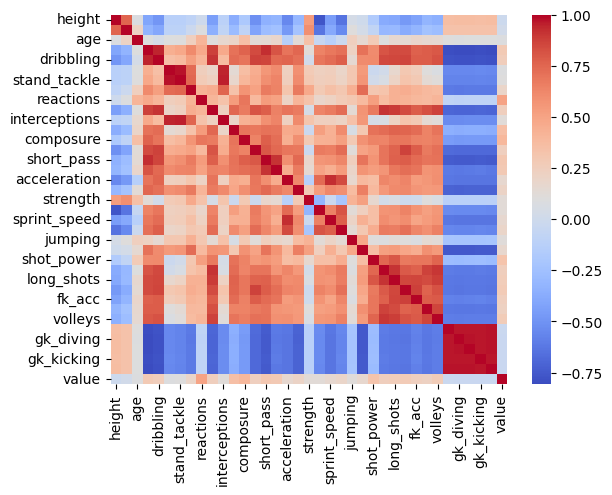

In [134]:
sns.heatmap(corr, cmap="coolwarm")
plt.show()

#### Выделил 7 признаков, которые, по моему мнению, не имеют запредельной корреляции с остальными фичами и детально характеризуют нашего спортсмена
##### игровые характеристики
* `shot_power`
* `dribbling`
* `finishing`

##### признаки, состоящие из показателей здоровья
* `stamina`
* `sprint_speed`
* `composure`
* `reactions`

Также такие признаки, как `value` и `country` интересны 

### Аналитика 

In [135]:
best_features = ['shot_power', 'dribbling', 'finishing', 'stamina', 'sprint_speed', 'composure', 'reactions']

In [136]:
print(f'Всего стран: {df['country'].nunique()}')
print(f'Всего клубов: {df['club'].nunique()}')

Всего стран: 135
Всего клубов: 683


In [137]:
TOP_RECORDS = 15 # Топ записей, которые будем отображать

#### Топ стран по количеству профессиональных спортсменов

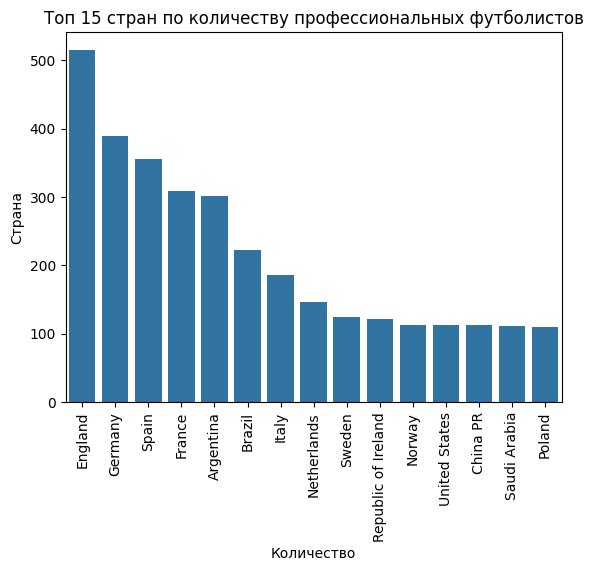

In [138]:
sns.barplot(df['country'].value_counts().nlargest(TOP_RECORDS).reset_index(), x='country', y='count')
plt.title(f'Топ {TOP_RECORDS} стран по количеству профессиональных футболистов')
plt.xlabel('Количество')
plt.ylabel('Страна')
plt.xticks(rotation=90)
plt.show()

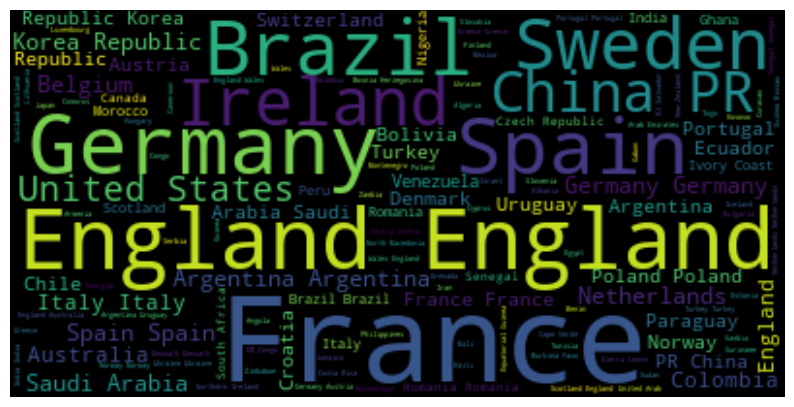

In [139]:
countries = " ".join(n for n in df['country'])

plt.figure(figsize=(10, 10)) 

wc = WordCloud().generate(countries)

plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

#### Самые дорогие и дешевые игроки, и некоторые их показатели

In [140]:
df_cost_players = df[['player', 'country', 'club', 'value', *best_features]].sort_values(by='value', ascending=False)

df_cost_players

,player,country,club,value,shot_power,dribbling,finishing,stamina,sprint_speed,composure,reactions
5229,Kylian Mbappe,France,Paris SG,153500000,88,93,93,87,97,88,93
1965,Erling Haaland,Norway,Manchester City,123000000,94,78,94,81,94,86,89
4849,Kevin De Bruyne,Belgium,Manchester City,107500000,92,86,85,89,73,88,91
916,Sadio Mane,Senegal,FC Bayern München,101000000,83,88,85,85,86,84,91
5679,Neymar Jr,Brazil,Paris SG,99500000,79,95,83,79,86,93,88
...,...,...,...,...,...,...,...,...,...,...,...
2533,Enrico Guarna,Italy,Ascoli,1500,44,9,7,34,41,53,64
5565,Eldin Jakupovic,Switzerland,LAFC,1000,47,11,12,30,30,62,58
387,Scott Flinders,England,Mansfield Town,600,47,11,16,36,29,50,58
1548,Andy Lonergan,England,Everton,600,38,11,14,28,41,30,54


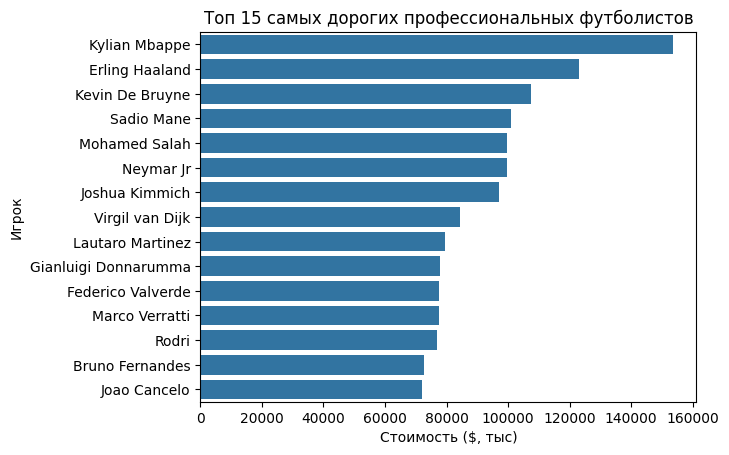

In [141]:
df_largest_cost_players = df.copy()

df_largest_cost_players['value'] = df_largest_cost_players['value'].apply(lambda v: v/1000)

sns.barplot(df_largest_cost_players.nlargest(TOP_RECORDS, 'value'), x='value', y='player')
plt.title(f'Топ {TOP_RECORDS} самых дорогих профессиональных футболистов')
plt.xlabel('Стоимость ($, тыс)')
plt.ylabel('Игрок')
plt.show()


#### Сравнение самого дорого, медианного и дешевого игроков

In [142]:
features = ['sprint_speed', 'stamina', 'reactions', 'finishing', 'shot_power', 'composure', 'dribbling']

In [143]:
player_name_1 = 'Kylian Mbappe'
player_1 = df[df['player'] == player_name_1]
values_1 = []

for feature in features:
    values_1.append(int(player_1[feature])) # type: ignore

In [144]:
player_name_2 = 'Richard Brush'
player_2 = df[df['player'] == player_name_2]
values_2 = []

for feature in features:
    values_2.append(int(player_2[feature])) # type: ignore

In [145]:
median_index = len(df_cost_players) // 2  # Индекс среднего игрока по стоимости
median_player = df_cost_players.iloc[median_index]

player_name_3 = median_player['player']
player_3 = df[df['player'] == player_name_3]
values_3 = []

for feature in features:
    values_3.append(int(player_3[feature])) # type: ignore

In [146]:
features = ['Скорость бега', 'Выносливость', 'Реакция', 'Окончание момента', 'Сила удара', 'Хладнокровность', 'Дриблинг'] # Перевод признаков на русский язык

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=values_1,
      theta=features,
      fill='toself',
      name=player_name_1
))

fig.add_trace(go.Scatterpolar(
      r=values_3,
      theta=features,
      fill='toself',
      name=player_name_3
))

fig.add_trace(go.Scatterpolar(
      r=values_2,
      theta=features,
      fill='toself',
      name=player_name_2
))

fig.update_layout(
  title='Радар-график параметров игроков 3\'х игроков',
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show()

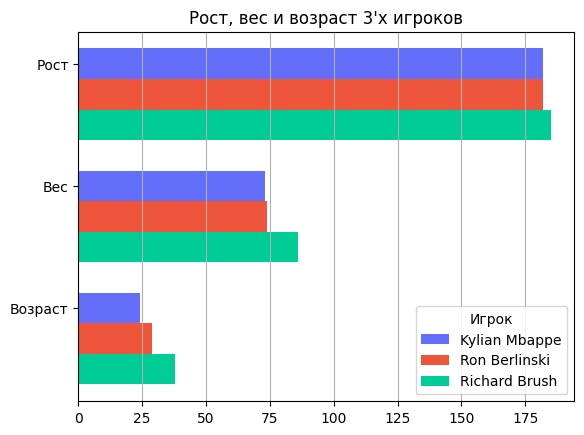

In [147]:
features = ['height', 'weight', 'age']
features_ru = ['Рост', 'Вес', 'Возраст']


bar_width = 0.25
features_count = np.arange(len(features))

ax = plt.gca()

# Добавление 3'х плотов
ax.barh(features_count, player_1[features].values.tolist()[0], bar_width, color='#636EFA', label=player_name_1)
ax.barh(features_count + bar_width, player_3[features].values.tolist()[0], bar_width, color='#EF553B', label=player_name_3)
ax.barh(features_count + bar_width*2, player_2[features].values.tolist()[0], bar_width, color='#00CC96', label=player_name_2)

# Настройки
ax.set(yticks=features_count+ bar_width)
ax.set_yticks(features_count, labels=features)
ax.set_yticklabels(features_ru, minor=False)
ax.invert_yaxis()  

plt.title('Рост, вес и возраст 3\'х игроков')
plt.legend(title='Игрок')
plt.grid(axis='x')
plt.show()

#### Аналитика ростов игроков

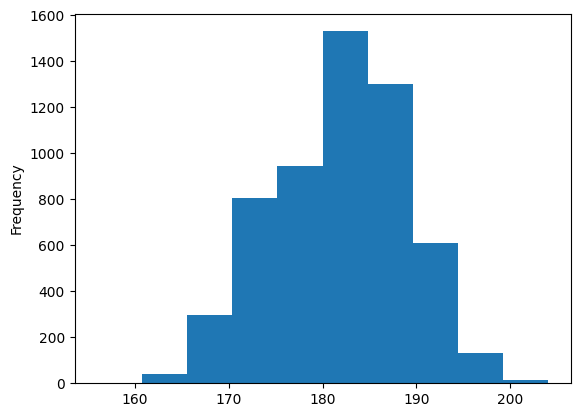

In [148]:
df['height'].plot(kind='hist')

plt.show()

In [149]:
bins = [160, 170, 180, 190,  200]

height_binning = pd.cut(df['height'], bins)
height_binning.value_counts(sort=False)

height
(160, 170]     338
(170, 180]    2197
(180, 190]    2547
(190, 200]     584
Name: count, dtype: int64

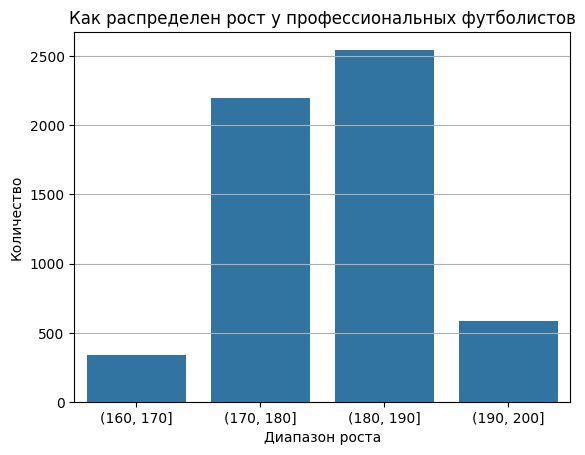

In [150]:

df['height_diapason'] = height_binning

sns.barplot(df['height_diapason'].value_counts())
plt.grid(axis='y')
plt.title('Как распределен рост у профессиональных футболистов')
plt.xlabel('Диапазон роста')
plt.ylabel('Количество')
plt.show()

#### Как изменяется выносливость с возрастом

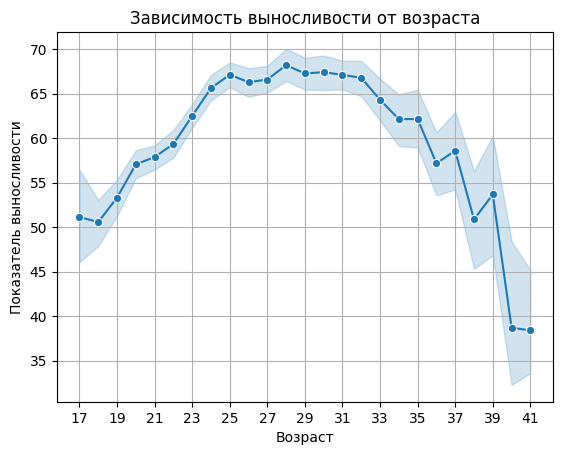

In [151]:
X_AGES = sorted(df['age'].unique())

ax = sns.lineplot(df, x='age', y='stamina', marker='o')
ax.set(xticks=X_AGES[::2])
plt.grid()
plt.title('Зависимость выносливости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Показатель выносливости')
plt.show()

#### Распределения возрастов в топ клубах

In [152]:
df['bmi'] = df['weight'] / (df['height']/100)**2 # Рассчитываем ИМТ для каждого игрока

In [153]:
df_clubs = df[['player', 'bmi', 'club', 'value']].groupby('club').agg({'player': 'count', 'value': 'mean', 'bmi': 'mean'}).reset_index().sort_values(by='value', ascending=False)

df_clubs = df_clubs.sort_values(by='value', ascending=False).nlargest(TOP_RECORDS, 'value')

df_clubs

,club,player,value,bmi
392,Manchester City,9,4.744817e+07,23.287207
450,Paris SG,11,4.547500e+07,22.571815
208,FC Bayern München,10,4.095430e+07,23.198312
496,Real Madrid,7,2.948643e+07,23.245848
393,Manchester Utd,14,2.488054e+07,22.635699
330,Inter,7,2.410036e+07,23.374131
137,Chelsea,9,2.372889e+07,21.988556
381,Liverpool,18,2.298269e+07,22.672240
99,Brazil,10,2.150000e+07,23.379485
647,Villarreal CF,7,2.116107e+07,22.495245


In [154]:
df_top_club_players = df[df['club'].isin(df_clubs['club'].values)]

df_top_club_players = df_top_club_players.merge(df_clubs[['club', 'value']], on='club')

df_top_club_players = df_top_club_players.sort_values(by='value_y', ascending=False)

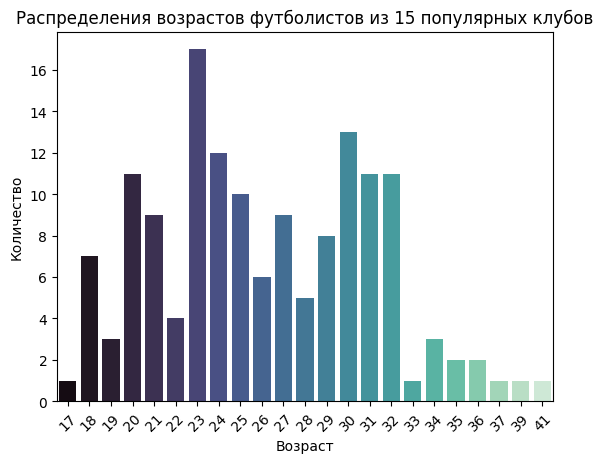

In [155]:
sns.barplot(x=df_top_club_players['age'].value_counts().index, y=df_top_club_players['age'].value_counts(), palette="mako")
plt.title(f'Распределения возрастов футболистов из {TOP_RECORDS} популярных клубов')
plt.xticks(rotation=45)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

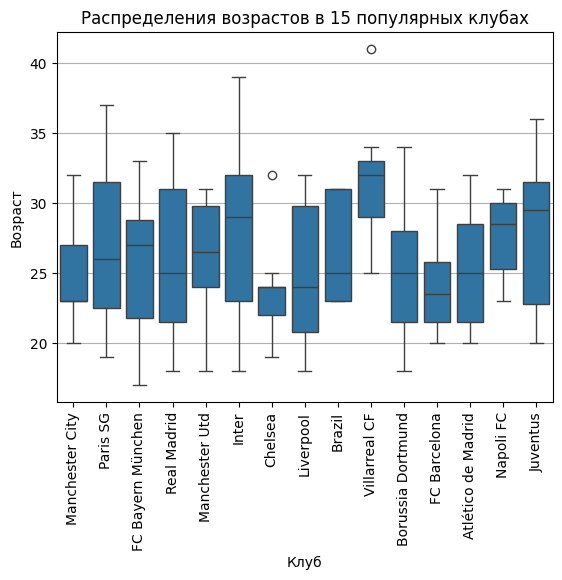

In [156]:
sns.boxplot(df_top_club_players, x='club', y='age')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title(f'Распределения возрастов в {TOP_RECORDS} популярных клубах')
plt.xlabel('Клуб')
plt.ylabel('Возраст')
plt.show()

#### ИМТ

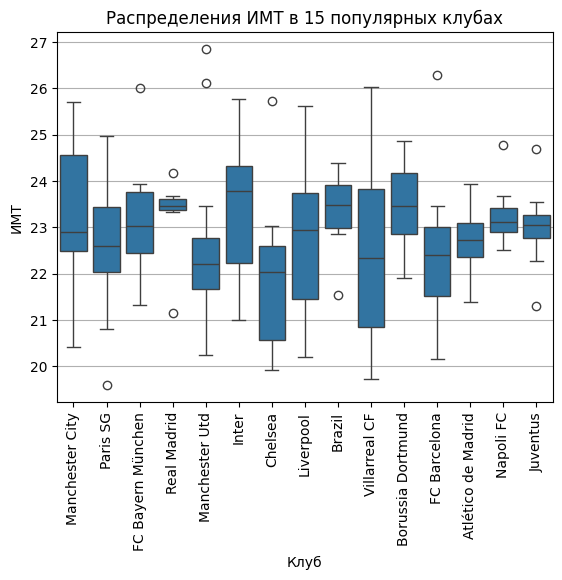

In [157]:
df['bmi'] = df['weight'] / (df['height']/100)**2 

sns.boxplot(x='club', y='bmi', data=df_top_club_players)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title(f'Распределения ИМТ в {TOP_RECORDS} популярных клубах')
plt.xlabel('Клуб')
plt.ylabel('ИМТ')
plt.show()

#### Зависимость реакции от возраста 

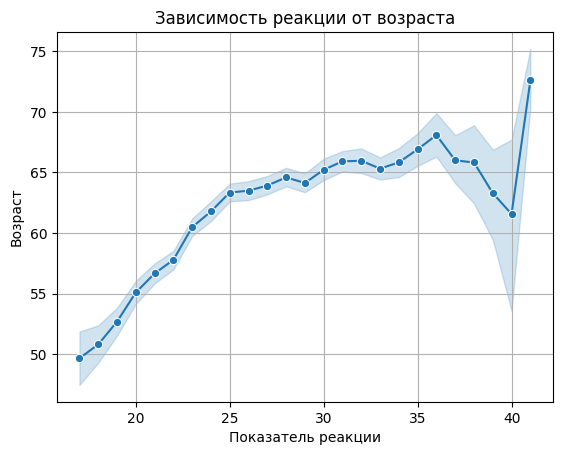

In [158]:
sns.lineplot(df, x='age', y='reactions', marker='o')
plt.grid()
plt.title('Зависимость реакции от возраста')
plt.xlabel('Показатель реакции')
plt.ylabel('Возраст')
plt.show()

#### Зависимость способности завершить ситуацию от хладнокровия

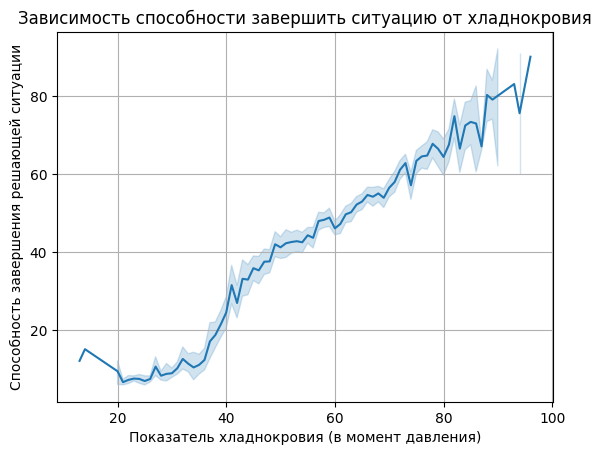

In [159]:
sns.lineplot(df, x='composure', y='finishing')
plt.grid()
plt.title('Зависимость способности завершить ситуацию от хладнокровия')
plt.xlabel('Показатель хладнокровия (в момент давления)')
plt.ylabel('Способность завершения решающей ситуации')
plt.show()

#### Зависимость агрессии от веса футболиста

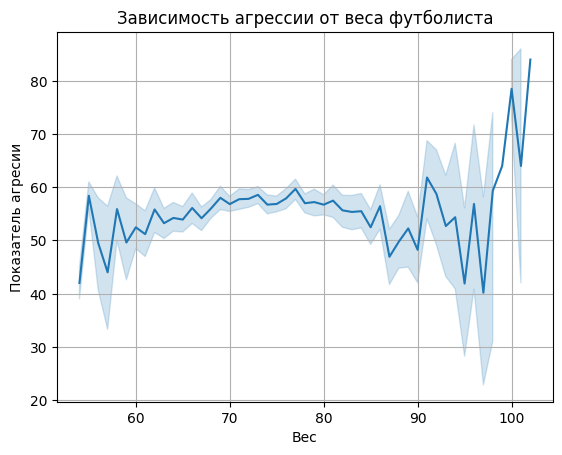

In [160]:
sns.lineplot(df, x='weight', y='aggression')
plt.grid()
plt.title('Зависимость агрессии от веса футболиста')
plt.xlabel('Вес')
plt.ylabel('Показатель агресии')

plt.show()